In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("Incident_EDA.csv")

In [5]:
data.head()

,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,cmdb_ci,impact,urgency,priority,knowledge,u_priority_confirmation,problem_id,rfc,vendor,caused_by,Cluster_Category,Cluster_group,diff
0,New,True,0,0,0,True,False,2 - Medium,2 - Medium,3 - Moderate,True,False,False,False,False,False,0,0,0.0
1,Resolved,True,0,0,2,True,False,2 - Medium,2 - Medium,3 - Moderate,True,False,False,False,False,False,0,0,7.0
2,Resolved,True,0,0,3,True,False,2 - Medium,2 - Medium,3 - Moderate,True,False,False,False,False,False,0,0,10.0
3,Closed,False,0,0,4,True,False,2 - Medium,2 - Medium,3 - Moderate,True,False,False,False,False,False,0,0,130.0
4,New,True,0,0,0,True,False,2 - Medium,2 - Medium,3 - Moderate,True,False,False,False,False,False,0,0,0.0


In [25]:
X = data.drop("impact",axis=1)
y = data['impact']

In [26]:
X = pd.get_dummies(X,drop_first=True)

In [27]:
from sklearn.preprocessing import LabelEncoder
y_label = LabelEncoder()

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [29]:
y_train.value_counts()

2 - Medium    94032
3 - Low        2733
1 - High       2433
Name: impact, dtype: int64

In [30]:
y_test.value_counts()

2 - Medium    40303
3 - Low        1153
1 - High       1058
Name: impact, dtype: int64

In [31]:
y_train = y_label.fit_transform(y_train)

In [32]:
y_test = y_label.transform(y_test)

In [33]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [34]:
pred = model.predict(X_test)

In [35]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [36]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1058
           1       1.00      1.00      1.00     40303
           2       0.98      0.97      0.98      1153

    accuracy                           1.00     42514
   macro avg       0.99      0.99      0.99     42514
weighted avg       1.00      1.00      1.00     42514



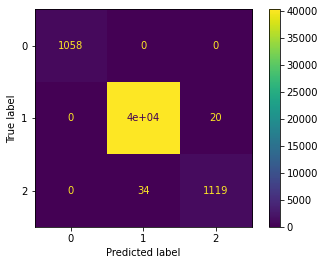

In [37]:
plot_confusion_matrix(model,X_test,y_test)

In [38]:
4e+04

40000.0

<AxesSubplot:>

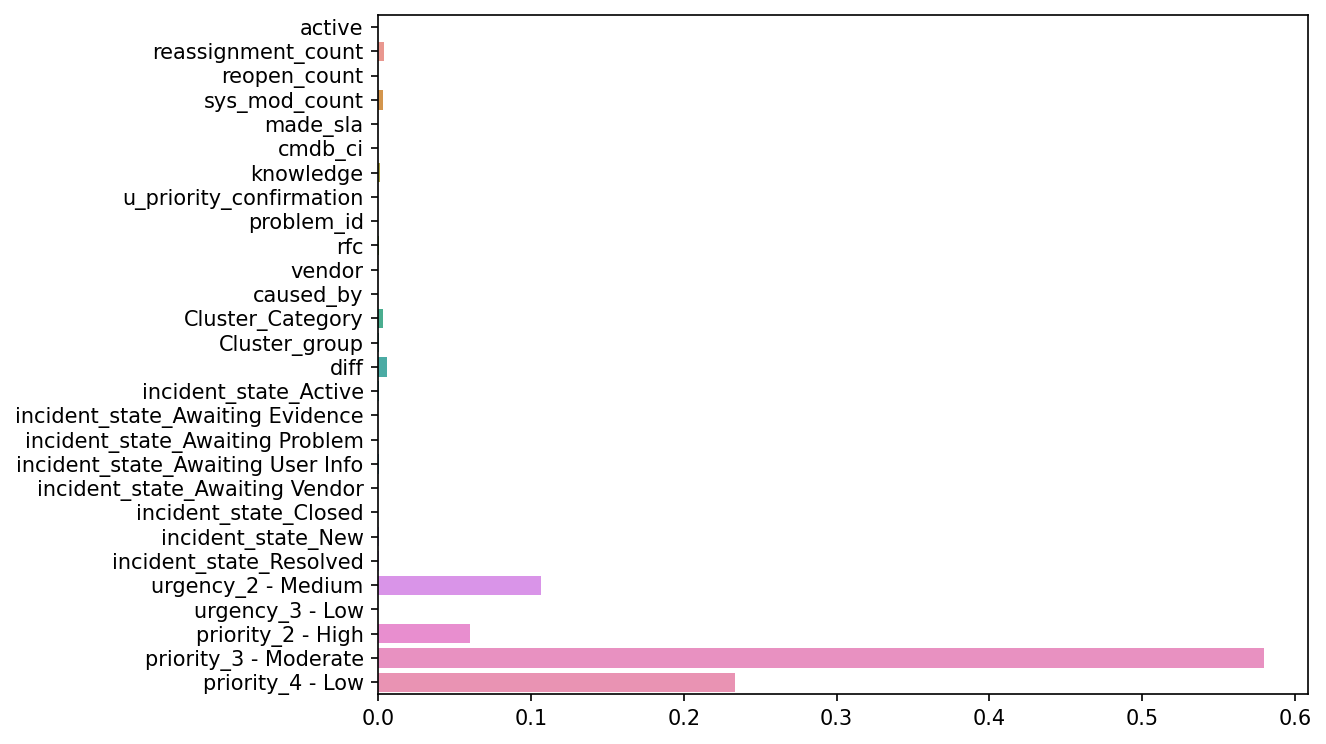

In [42]:
plt.figure(figsize=(8,6),dpi=150)
sns.barplot(x=model.feature_importances_,y=X.columns)

In [43]:
pred_train = model.predict(X_train)

In [44]:
print(classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2433
           1       1.00      1.00      1.00     94032
           2       0.99      1.00      1.00      2733

    accuracy                           1.00     99198
   macro avg       1.00      1.00      1.00     99198
weighted avg       1.00      1.00      1.00     99198



In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
log_model = LogisticRegression()

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler =StandardScaler()

In [50]:
scaled_Xtrain = scaler.fit_transform(X_train)
scaled_Xtest = scaler.transform(X_test)

In [51]:
log_model.fit(scaled_Xtrain,y_train)

C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [52]:
log_pred_test = log_model.predict(scaled_Xtest)

In [53]:
print(classification_report(y_test,log_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1058
           1       1.00      1.00      1.00     40303
           2       0.96      1.00      0.98      1153

    accuracy                           1.00     42514
   macro avg       0.99      1.00      0.99     42514
weighted avg       1.00      1.00      1.00     42514



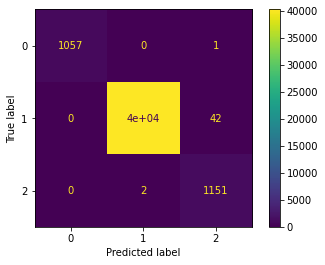

In [55]:
plot_confusion_matrix(log_model,scaled_Xtest,y_test)

In [65]:
np.unique(log_pred_test)

array([0, 1, 2])

In [67]:
X = data.drop(["impact",'urgency','priority'],axis=1)
y = data['impact']

In [68]:
X = pd.get_dummies(X,drop_first=True)

In [69]:
from sklearn.preprocessing import LabelEncoder
y_label = LabelEncoder()

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [71]:
y_train = y_label.fit_transform(y_train)
y_test = y_label.transform(y_test)

In [72]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [73]:
pred = model.predict(X_test)

In [74]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.52      0.44      0.47      1058
           1       0.96      0.98      0.97     40303
           2       0.25      0.13      0.17      1153

    accuracy                           0.94     42514
   macro avg       0.58      0.52      0.54     42514
weighted avg       0.93      0.94      0.94     42514



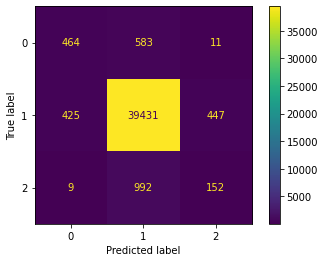

In [75]:
plot_confusion_matrix(model,X_test,y_test)

<AxesSubplot:>

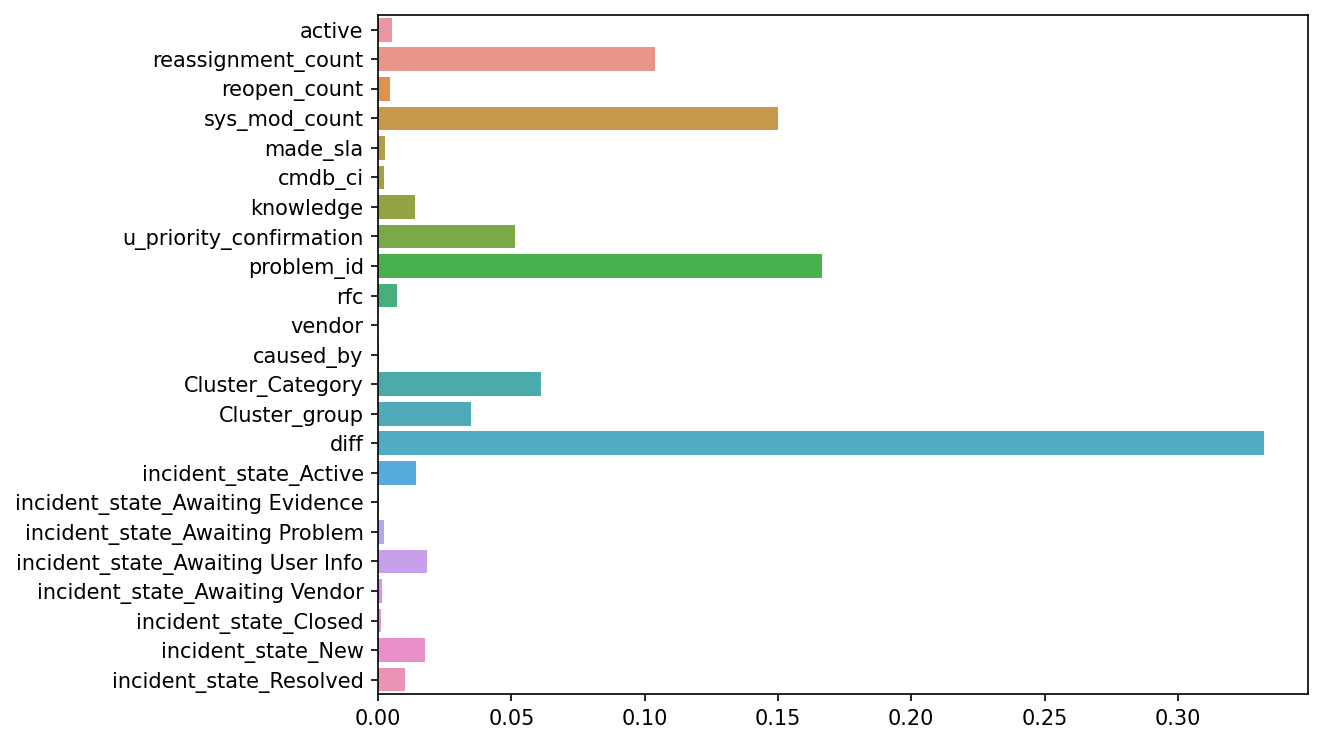

In [76]:
plt.figure(figsize=(8,6),dpi=150)
sns.barplot(x=model.feature_importances_,y=X.columns)

In [78]:
X = data[['urgency','priority']]
y = data['impact']

In [79]:
X = pd.get_dummies(X,drop_first=True)
y_label = LabelEncoder()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
y_train = y_label.fit_transform(y_train)
y_test = y_label.transform(y_test)
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1058
           1       1.00      1.00      1.00     40303
           2       0.96      1.00      0.98      1153

    accuracy                           1.00     42514
   macro avg       0.99      1.00      0.99     42514
weighted avg       1.00      1.00      1.00     42514



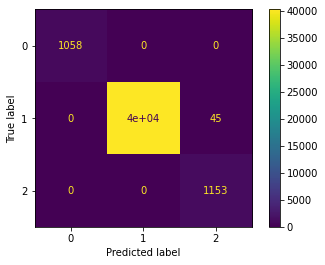

In [80]:
plot_confusion_matrix(model,X_test,y_test)

In [100]:
impact_corr = data[["impact","urgency","priority"]]

In [84]:
label_cor = LabelEncoder()

In [86]:
impact = label_cor.fit_transform(impact_corr.impact)

In [87]:
urgency = label_cor.fit_transform(impact_corr.urgency)

In [88]:
priority = label_cor.fit_transform(impact_corr.priority)

In [92]:
impact_corr.impact = impact

In [93]:
impact_corr.urgency = urgency

In [94]:
impact_corr.priority = priority

<AxesSubplot:>

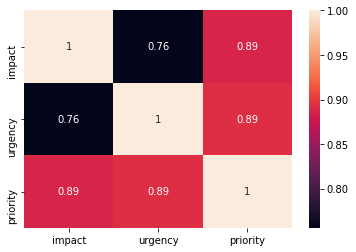

In [97]:
sns.heatmap(impact_corr.corr(),annot=True)